In [ ]:
from multiprocessing.pool import ThreadPool
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
%matplotlib inline
import os
import random
import glob
import itertools
from keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf
from keras import regularizers

In [ ]:
import pandas as pd
random.seed(10)
trainLabels = pd.read_csv('C:\\Users\\user\\Downloads\\trainLabels.csv')
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
from PIL import Image
from PIL import Image, ImageOps, ImageFilter 
from keras.preprocessing import image
import os
import numpy as np
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
img_rows, img_cols = 250,250
Batch_size = 16

listing = os.listdir("C:\\Users\\user\\Downloads\\train") 

immatrix = []
imlabel = []

for file in listing:
        #removes extentstion in file name so it can match the actual filename with its listing and grade in the csv file
        fileName = os.path.splitext(file)[0]
        #read from csv/table above to get the photo ID number and DR grade in an array
        imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
        im1 = Image.open("C:\\Users\\user\\Downloads\\train\\" + str(file))
        #Enhance the image using detail enhancer, apply gaussian blur to further preserve edges and details, make image grayscale
        im2 = im1.filter(ImageFilter.GaussianBlur)
        im3 = im2.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im = ImageOps.grayscale(im3) 
        img = np.array(im.resize((img_rows,img_cols)))
        immatrix.append(np.array(img))

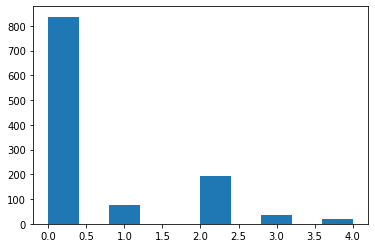

In [ ]:
from sklearn.utils import shuffle
#imlabel.pop()
data,label = shuffle(immatrix, imlabel, random_state=42)
train_data = [data,label]
import matplotlib.pyplot as plt
plt.hist(label)
plt.show()

level: 0


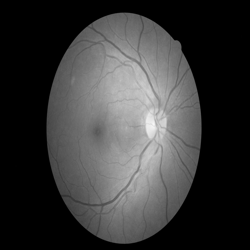

In [ ]:
im = Image.fromarray(immatrix[1])
print("level:",imlabel[1])
im 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.utils import np_utils
x_train, x_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size = 0.1, random_state = 42)

class_weights = class_weight.compute_class_weight(class_weight ='balanced', classes = [0,1,2,3,4], y = y_train)
class_weights = {i : class_weights[i] for i in range(5)}
print(class_weights)

x_train = np.array(x_train)
y_train = np.array(y_train)



y_train = np_utils.to_categorical(np.array(y_train), 5)
y_test = np_utils.to_categorical(np.array(y_test), 5)

x_train = np.array(x_train).astype("float32")/255.
x_test = np.array(x_test).astype("float32")/255.


print(np.array(x_train).shape)
print(np.array(y_train).shape)

{0: 0.2788282290279627, 1: 3.1253731343283584, 2: 1.1897727272727272, 3: 6.54375, 4: 9.971428571428572}
(1047, 250, 250)
(1047, 5)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.optimizers import RMSprop 

cnn_base = InceptionV3(input_shape= (250,250,3), weights='imagenet', include_top=False,)
cnn_base.trainable = False 

#FLatten the output Layer to 1 dimension 
x = tf.keras.layers.Flatten()(cnn_base.output) 
# Add a fuLLy connected Layer with 1, 024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
#add a finaL sigmoid Layer for classification 
x = tf.keras.layers.Dense(5,activation='sigmoid')(x) 
model = tf.keras.Model(cnn_base.input,x) 
model.compile(optimizer = RMSprop(lr = .01), loss = "categorical_crossentropy", metrics=['accuracy']) 
model.summary() 
model.fit(x_train, y_train, batch_size = 75, epochs = 10,validation_split=0.3, verbose = 2, class_weight= class_weights) 

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1786 (Conv2D)            (None, 124, 124, 32) 864         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1786 (Batch (None, 124, 124, 32) 96          conv2d_1786[0][0]                
__________________________________________________________________________________________________
activation_1786 (Activation)    (None, 124, 124, 32) 0           batch_normalization_1786[0][0]   
___________________________________________________________________________________________

Epoch 1/10


ValueError: in user code:

    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\user\lanaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d_1786 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 250, 250)
